In [5]:
import pandas as pd

dataset = pd.read_csv('gym_exercise_data/megaGymDataset.csv', index_col=0)

dataset['UserAge'] = None  # Age of the user
dataset['UserWeight'] = None  # Current weight of the user
dataset['TargetWeight'] = None  # Target weight of the user
dataset['UserGoal'] = None  # Fitness goal (e.g., "Build Muscle", "Lose Fat")
dataset['Progress'] = None  # Track progress (e.g., "Weight gained 2kg")


# Example user inputs
user_data = {
    'UserAge': 24,
    'UserWeight': 70,
    'TargetWeight': 75,
    'UserGoal': 'Build Muscle',
    'Progress': None  # Initially empty
}

# Add user inputs to the dataset
for key, value in user_data.items():
    dataset[key] = value

drop_columns = ['Unnamed: 0']

# Save the updated structure for further use
dataset_path = "gym_exercise_data/Updated_GymDataset.csv"
dataset.to_csv(dataset_path, index=False)

# Display the first few rows of the updated dataset
dataset.head()


,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc,UserAge,UserWeight,TargetWeight,UserGoal,Progress
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN,24,70,75,Build Muscle,None
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN,24,70,75,Build Muscle,None
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN,24,70,75,Build Muscle,None
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN,24,70,75,Build Muscle,None
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN,24,70,75,Build Muscle,None


In [6]:
def recommend_exercises(age, weight, target_weight, goal, dataset):
    """
    Recommends exercises based on user inputs.
    :param age: User's age
    :param weight: User's current weight
    :param target_weight: User's target weight
    :param goal: User's fitness goal
    :param dataset: The dataset containing exercise details
    :return: Filtered recommendations
    """
    # Filter exercises based on the user's goal
    if goal == "Build Muscle":
        recommended = dataset[dataset['Type'].str.contains("Strength", na=False)]
    elif goal == "Lose Fat":
        recommended = dataset[dataset['Type'].str.contains("Cardio", na=False)]
    elif goal == "Increase Flexibility":
        recommended = dataset[dataset['Type'].str.contains("Stretching", na=False)]
    else:
        recommended = dataset  # Default: return all exercises
    
    # Return a subset of useful columns
    return recommended[['Title', 'Type', 'BodyPart', 'Equipment', 'Level']].head(10)  # Limit results to 10

user_age = 24
user_weight = 70
user_target_weight = 75
user_goal = "Build Muscle"

recommendations = recommend_exercises(user_age, user_weight, user_target_weight, user_goal, dataset)
print(recommendations)

                           Title      Type    BodyPart Equipment         Level
0         Partner plank band row  Strength  Abdominals     Bands  Intermediate
1   Banded crunch isometric hold  Strength  Abdominals     Bands  Intermediate
2          FYR Banded Plank Jack  Strength  Abdominals     Bands  Intermediate
3                  Banded crunch  Strength  Abdominals     Bands  Intermediate
4                         Crunch  Strength  Abdominals     Bands  Intermediate
5      Decline band press sit-up  Strength  Abdominals     Bands  Intermediate
6          FYR2 Banded Frog Pump  Strength  Abdominals     Bands  Intermediate
7         Band low-to-high twist  Strength  Abdominals     Bands  Intermediate
8               Barbell roll-out  Strength  Abdominals   Barbell  Intermediate
9  Barbell Ab Rollout - On Knees  Strength  Abdominals   Barbell  Intermediate


In [8]:
user_progress = {
    'UserAge': 24,
    'UserWeight': 70,
    'TargetWeight': 75,
    'UserGoal': 'Build Muscle',
    'Progress': "Weight gained 2kg after 4 weeks"
}

progress_df = pd.DataFrame([user_progress])
progress_df.to_csv("gym_exercise_data/UserProgress.csv", index=False)
print("User progress saved successfully!")
print(progress_df)

User progress saved successfully!
   UserAge  UserWeight  TargetWeight      UserGoal  \
0       24          70            75  Build Muscle   

                          Progress  
0  Weight gained 2kg after 4 weeks  


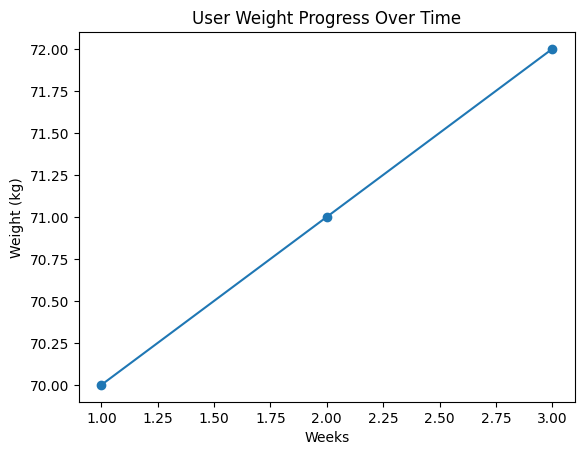

In [9]:
import matplotlib.pyplot as plt

weights = [70,71,72]
weeks = [1,2,3]

plt.plot(weeks, weights, marker='o')
plt.title("User Weight Progress Over Time")
plt.xlabel("Weeks")
plt.ylabel("Weight (kg)")
plt.show()